In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame
uber = pd.read_csv('uberPricesNew.csv')
uber["avg_estimate"] = (uber["high_estimate"] + uber["low_estimate"]) / 2
uber = uber[["place","dist","display_name","avg_estimate","time"]]
uber.head()

,place,dist,display_name,avg_estimate,time
0,Centennial Park,1.37,UberPool,7.5,23:00
1,Centennial Park,1.37,UberX,8.0,23:00
2,Centennial Park,1.37,UberXL,10.5,23:00
3,Centennial Park,1.37,Select,13.0,23:00
4,Centennial Park,1.37,Black,17.0,23:00


In [4]:
lyft = pd.read_csv('lyftPricesNew.csv')
lyft["avg_estimate"] = (lyft["high_estimate"] + lyft["low_estimate"]) / 2
lyft= lyft[["place","dist","display_name","avg_estimate","time"]]
lyft.head()

,place,dist,display_name,avg_estimate,time
0,Centennial Park,1.71,Shared,3.0,23:00
1,Centennial Park,1.71,Lyft,7.0,23:00
2,Centennial Park,1.71,Lyft XL,10.5,23:00
3,Centennial Park,1.71,Lux,13.5,23:00
4,Centennial Park,1.71,Lux Black,16.5,23:00


## Linear Regression with seperate Uber and Lyft Files

In [5]:
uber = pd.get_dummies(uber)

In [6]:
uber.columns

Index(['dist', 'avg_estimate', 'place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'display_name_Black', 'display_name_Black SUV', 'display_

In [7]:
X = uber[['dist', 'place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'display_name_Black', 'display_name_Black SUV', 'display_name_Select',
       'display_name_UberPool', 'display_name_UberX', 'display_name_UberXL',
       'time_00:00', 'time_01:00', 'time_02:00', 'time_03:00', 'time_04:00',
       'time_05:00', 'time_06:00', 'time_07:00', 'time_08:00', 'time_09:00',
       'time_10:00', 'time_11:00', 'time_12:00', 'time_13:00', 'time_14:00',
       'time_15:00', 'time_16:00', 'time_17:00', 'time_18:00', 'time_19:00',
       'time_20:00', 'time_21:00', 'time_22:00', 'time_23:00']]

In [8]:
uber.shape

(78390, 71)

In [9]:
y = uber["avg_estimate"].values.reshape(-1, 1)
print(X.shape, y.shape)

(78390, 70) (78390, 1)


In [10]:
lyft = pd.get_dummies(lyft)

In [11]:
lyft.columns

Index(['dist', 'avg_estimate', 'place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'display_name_Lux', 'display_name_Lux Black',
       'dis

### Linear regression Uber

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8322472136606561
Testing Score: 0.8365531161641702


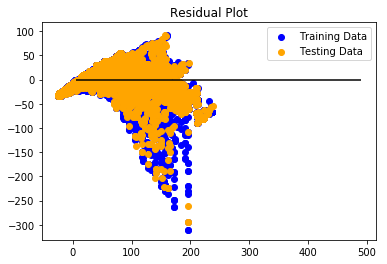

In [15]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 561.3967064975398, R2: 0.8365531161641702


In [17]:
predictions-y_test

array([[  5.42134094],
       [-47.77900696],
       [ -1.1519165 ],
       ...,
       [ 14.20021057],
       [ -4.48979187],
       [ -5.96286011]])

### LassoLars Regression Uber

In [18]:
from sklearn.linear_model import LassoLars
reg = LassoLars(alpha=0.01)
reg.fit(X_train, y_train)
training_score1 = reg.score(X_train, y_train)
testing_score1 = reg.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score1}")
print(f"Testing Score: {testing_score1}")

Training Score: 0.8132481350749585
Testing Score: 0.8187404771100628


### SVR Regression Uber

In [ ]:
# Did not work
hey
from sklearn.svm import SVR

clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X, y) 
training_score2 = clf.score(X_train, y_train)
testing_score2 = clf.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score2}")
print(f"Testing Score: {testing_score2}")

### Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

regr1 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr1.fit(X, y)
training_score3 = regr1.score(X_train, y_train)
testing_score3 = regr1.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

C:\Users\Meryem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Score: 0.6484871590680775
Testing Score: 0.654720272798534


In [20]:
from sklearn.ensemble import RandomForestRegressor

regr2 = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
regr2.fit(X, y)
training_score3 = regr2.score(X_train, y_train)
testing_score3 = regr2.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

C:\Users\Meryem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Score: 0.9076158745876411
Testing Score: 0.9117877434411873


In [39]:
from sklearn.ensemble import RandomForestRegressor

regr3 = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=200)
regr3.fit(X, y.ravel())
training3_score3 = regr3.score(X_train, y_train.ravel())
testing3_score3 = regr3.score(X_test, y_test.ravel())

### END SOLUTION 

print(f"Training Score: {training3_score3}")
print(f"Testing Score: {testing3_score3}")

predictionsrf3 = regr3.predict(X_test)
MSE3 = mean_squared_error(y_test.ravel(), predictionsrf3)
r23 = regr3.score(X_test, y_test.ravel())
print(f"MSE: {MSE3}, R2: {r23}")

Training Score: 0.9573851135900806
Testing Score: 0.9595558333540151
MSE: 138.91498827777747, R2: 0.9595558333540151


In [23]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=200)
regr.fit(X, y.ravel())
training_score3 = regr.score(X_train, y_train)
testing_score3 = regr.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

Training Score: 0.9573851135900806
Testing Score: 0.9595558333540151


In [22]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=11, random_state=0, n_estimators=200)
regr.fit(X, y.ravel())
training_score3 = regr.score(X_train, y_train.ravel())
testing_score3 = regr.score(X_test, y_test.ravel())

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

Training Score: 0.9808436516928598
Testing Score: 0.9821054331005403


In [26]:
predictionsrf = regr.predict(X_test)
MSE = mean_squared_error(y_test.ravel(), predictionsrf)
r2 = regr.score(X_test, y_test.ravel())

print(f"MSE: {MSE}, R2: {r2}")

MSE: 61.46309238692467, R2: 0.9821054331005403


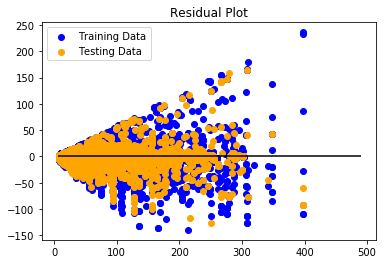

In [25]:
plt.scatter(regr.predict(X_train), regr.predict(X_train) - y_train.ravel(), c="blue", label="Training Data")
plt.scatter(regr.predict(X_test), regr.predict(X_test) - y_test.ravel(), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.ravel().min(), xmax=y_test.ravel().max())
plt.title("Residual Plot")
plt.show()

In [24]:
regr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [23]:
importances = regr.feature_importances_
importances

array([6.27835414e-01, 5.81747580e-07, 3.05263780e-04, 4.71572808e-06,
       3.65498362e-05, 3.28106774e-06, 4.59478120e-05, 2.32705502e-05,
       1.44310879e-05, 5.56679050e-04, 4.68969916e-06, 2.79108305e-05,
       1.81956520e-06, 5.01576805e-06, 1.61692586e-05, 3.03097031e-03,
       8.18463630e-07, 1.83043338e-05, 2.07765981e-07, 9.77999008e-06,
       4.80729518e-05, 7.09099578e-06, 1.18022655e-05, 6.47919906e-07,
       4.37124988e-06, 4.77403252e-07, 2.96770627e-05, 1.26138359e-04,
       1.78450650e-06, 1.06343263e-04, 4.37286609e-06, 1.24059457e-05,
       1.25700329e-04, 1.80663838e-05, 1.86759485e-07, 2.19589627e-05,
       1.69146016e-05, 5.14330436e-07, 8.36997850e-05, 3.22234169e-06,
       7.50747416e-02, 1.70350216e-01, 3.37427954e-02, 8.13392209e-05,
       1.13001642e-04, 4.97939454e-02, 3.16501247e-06, 1.00542131e-05,
       1.12629363e-06, 1.13625213e-05, 2.08407065e-05, 1.24519846e-05,
       7.07721610e-06, 3.34273082e-05, 4.46532837e-06, 1.67426075e-08,
      

In [24]:
# We can sort the features by their importance
sorted(zip(regr.feature_importances_, X.columns), reverse=True)

[(0.6278354136958626, 'dist'),
 (0.1703502160339029, 'display_name_Black SUV'),
 (0.07507474164260948, 'display_name_Black'),
 (0.04979394542214622, 'display_name_UberXL'),
 (0.03374279540739712, 'display_name_Select'),
 (0.013911088363991029, 'time_15:00'),
 (0.013793910792515116, 'time_16:00'),
 (0.00721862447160578, 'time_17:00'),
 (0.0030309703147913935, 'place_Forsyth'),
 (0.002476348886736381, 'time_18:00'),
 (0.0006508640355826689, 'time_14:00'),
 (0.000556679050365629, 'place_Coweta'),
 (0.00030526377988722333, 'place_Bartow'),
 (0.0001261383587801806, 'place_Paulding'),
 (0.00012570032921426627, 'place_Spalding'),
 (0.00011300164200424, 'display_name_UberX'),
 (0.00010634326322841264, 'place_Rockdale'),
 (8.369978503070949e-05, 'place_Walton'),
 (8.133922090778383e-05, 'display_name_UberPool'),
 (4.807295181678553e-05, 'place_Hall'),
 (4.59478120019686e-05, 'place_Cherokee'),
 (3.6549836174789076e-05, 'place_Butts'),
 (3.342730818789473e-05, 'time_07:00'),
 (2.9677062684347016

In [27]:
predictionsrf.shape

(19598,)

In [28]:
y_test

array([[ 14.5],
       [219.5],
       [107.5],
       ...,
       [ 32. ],
       [ 88. ],
       [ 40.5]])

In [31]:
y_test.ravel().shape

(19598,)

In [32]:
predictionsrf - y_test.ravel()

array([-0.08685193, -1.30554698,  1.36689794, ...,  1.71381544,
       -5.24679506, -0.23591488])

In [33]:
pr = regr.predict([[1.32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
pr

array([8.05690339])

In [34]:
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
xpr = uber.loc[(uber["dist"] == 1.32) & (uber["place_Atlanta High Museum"] == 1) &
                (uber["display_name_UberX"] == 1) & (uber["time_07:00"] == 1)]
xpr

,dist,avg_estimate,place_Atlanta High Museum,place_Bartow,place_Buckhead Bars,place_Butts,place_Centennial Park,place_Cherokee,place_Clayton,place_Cobb,...,time_14:00,time_15:00,time_16:00,time_17:00,time_18:00,time_19:00,time_20:00,time_21:00,time_22:00,time_23:00
2617,1.32,7.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2851,1.32,7.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3085,1.32,7.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3319,1.32,7.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3553,1.32,7.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3787,1.32,8.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4021,1.32,11.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4255,1.32,11.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62755,1.32,7.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62989,1.32,7.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
pd.DataFrame({"Predicted": predictionsrf, "Actual": y_test.ravel(), "Error": predictionsrf - y_test.ravel()})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,14.413148,14.5,-0.086852
1,218.194453,219.5,-1.305547
2,108.866898,107.5,1.366898
3,203.958586,207.5,-3.541414
4,150.126442,149.5,0.626442
5,43.953595,43.0,0.953595
6,129.530389,129.5,0.030389
7,51.901567,51.0,0.901567
8,35.281949,32.0,3.281949
9,55.545379,46.5,9.045379
